In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(type(digits))

<class 'sklearn.utils.Bunch'>


In [2]:
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
print(type(digits.data))
print(digits.data.shape)

<class 'numpy.ndarray'>
(1797, 64)


In [5]:
print(type(digits.data[0]))
print(digits.data[0].shape)
print(digits.data[0])

<class 'numpy.ndarray'>
(64,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


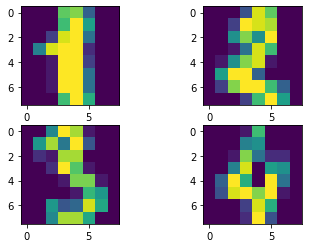

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(1, 5):
    plt.subplot(2,2, i)
    plt.imshow(digits.data[i].reshape(8, 8))
plt.show()

In [7]:
print(digits.target)

[0 1 2 ... 8 9 8]


In [8]:
import math
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size= 0.25 )
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1347, 64) (1347,) (450, 64) (450,)


In [29]:
# Train a SVM classification model
from time import time
print("Fitting the classifier to the training set")
t0 = time()

from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC

#clf = SVC(C= 1, gamma = 0.1, verbose=True, kernel='rbf')
#Tuning: Model selection
param_grid = {
               'C': [1e-3, 1e-2, 1, 1e2],
              'gamma': [0.0001, 0.001, 0.1, 1], 
               'kernel': ['linear', 'rbf'],
             }

clf = GridSearchCV( SVC(), param_grid)
clf.fit(X_train, y_train)

print("done in %0.3fs" , (time() - t0))

Fitting the classifier to the training set
done in %0.3fs 9.00764513015747


In [30]:
print(clf.score(X_test, y_test))
print("Best parameters selected from Grid search", clf.best_params_)

0.9933333333333333
Best parameters selected from Grid search {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [32]:
print("Indices of support vectors", clf.best_estimator_.support_.shape)
print("Dual coeffecients", clf.best_estimator_.dual_coef_.shape)

Indices of support vectors (673,)
Dual coeffecients (9, 673)


In [34]:
print("Number of support vectors per each class:", clf.best_estimator_.n_support_ )
print("\nIndices of support vectors", clf.best_estimator_.support_)
print("\nDual coeffecients", clf.best_estimator_.dual_coef_[0])

Number of support vectors per each class: [38 78 62 69 64 66 48 67 90 91]

Indices of support vectors [  25   95  129  135  143  156  196  238  249  305  312  313  365  398
  410  426  440  466  604  606  615  654  821  831  856  896  962  963
  968  984 1012 1023 1084 1118 1183 1232 1258 1283    0   69   89  134
  145  147  154  162  163  183  197  224  258  268  298  337  386  441
  465  498  506  507  508  516  535  570  573  579  597  641  649  684
  685  694  695  699  702  704  706  728  748  757  785  788  804  834
  864  865  882  889  902  904  918  919  929  935  965  969 1046 1051
 1061 1066 1098 1135 1140 1143 1151 1168 1201 1203 1206 1209 1221 1263
 1274 1278 1284 1291    7   28   71  111  112  125  133  144  148  153
  160  186  187  262  270  293  300  304  323  354  360  377  378  389
  435  446  452  456  457  470  524  526  564  575  602  610  626  670
  676  680  727  756  773  799  863  867  872  874  880  884  931  975
 1121 1152 1208 1231 1240 1250 1254 1273 1298 

In [35]:
clf.cv_results_ 

{'mean_fit_time': array([0.01313052, 0.07023344, 0.01350636, 0.07139201, 0.01472006,
        0.07404032, 0.01292992, 0.10920353, 0.0118875 , 0.07315917,
        0.01298332, 0.07463884, 0.0128087 , 0.08147378, 0.01241312,
        0.11589036, 0.01139631, 0.02530522, 0.01207571, 0.02238889,
        0.01066537, 0.0856082 , 0.01220465, 0.11910725, 0.01052861,
        0.01295633, 0.0121479 , 0.02913151, 0.01052575, 0.08335681,
        0.0121418 , 0.1213726 ]),
 'std_fit_time': array([2.00672697e-03, 3.87187659e-03, 3.96741948e-03, 9.05050184e-04,
        3.78281079e-03, 3.52496938e-03, 5.07893991e-03, 4.47413867e-03,
        3.23988766e-03, 2.19442156e-03, 6.32170718e-04, 1.53352342e-03,
        2.87624531e-03, 5.29541995e-03, 4.83464760e-04, 2.70962461e-03,
        1.60633681e-03, 5.33612571e-03, 3.14423979e-03, 5.42840862e-04,
        8.82793737e-04, 3.97771671e-03, 7.44637050e-04, 2.91215592e-03,
        8.25588775e-04, 3.75323191e-03, 3.12090607e-03, 9.66357773e-04,
        8.18870987e-0

In [27]:
from sklearn import neighbors, linear_model
logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=7000,
                                           multi_class='multinomial', verbose=2)

t0 = time()
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))
print("done in %0.3fs" , (time() - t0))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LogisticRegression score: 0.962222
done in %0.3fs 1.2495229244232178


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished


In [14]:
help(clf)

Help on GridSearchCV in module sklearn.model_selection._search object:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either e